In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import xgboost as xgb
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer

In [3]:
a = pd.read_csv('train.csv')
a.describe()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2,3,4,6,7,8,10,11,12,15,16,19,23,26,30,36,37,39,49,52,56,58,59,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,forecasting period,class
count,25121.000000,25121.000000,25121.000000
mean,12560.000000,2.608574,0.044823
std,7251.952392,1.063099,0.206919
min,0.000000,1.000000,0.000000
25%,6280.000000,2.000000,0.000000
50%,12560.000000,3.000000,0.000000
75%,18840.000000,4.000000,0.000000
max,25120.000000,4.000000,1.000000


In [4]:
a = a.apply(pd.to_numeric, errors = 'coerce', downcast = 'integer')
a.describe()


,id,forecasting period,net_profit_over_total_assets,total_liabilities_over_total_assets,working_capital_over_total_assets,current_assets_over_short_term_liabilities,cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365,retained_earnings_over_total_assets,EBIT_over_total_assets,book_value_of_equity_over_total_liabilities,...,sales_minus_cost_of_products_sold_over_sales,current_assets_minus_inventory_minus_short_term_liabilities_over_sales_minus_gross_profit_minus_depreciation,total_costs_overtotal_sales,long_term_liabilities_over_equity,sales_over_inventory,sales_over_receivables,short_term_liabilities_times_365_over_sales,sales_over_short_term_liabilities,sales_over_fixed_assets,class
count,25121.000000,25121.000000,25118.000000,25118.000000,25118.000000,25043.000000,2.506400e+04,25118.000000,25118.000000,25072.000000,...,25044.000000,25118.000000,25068.000000,25118.000000,2.383900e+04,25064.000000,2.504400e+04,25043.000000,24630.000000,25121.000000
mean,12560.000000,2.608574,0.046883,0.611913,0.098553,6.285753,-9.125936e+01,-0.067728,0.147535,15.153162,...,-0.770713,0.098693,4.429418,1.597135,3.225273e+02,14.315634,7.394522e+02,9.835042,77.756289,0.044823
std,7251.952392,1.063099,1.821696,5.933447,5.908136,339.973627,1.828476e+04,6.873121,5.835287,611.473437,...,72.977149,10.380960,383.343937,152.441163,1.606698e+04,120.835222,5.627363e+04,154.676272,2694.281611,0.206919
min,0.000000,1.000000,-256.889998,-72.162006,-479.959994,-0.044851,-1.670200e+06,-508.409992,-189.559992,-141.410220,...,-8534.599415,-979.250019,-1.631820,-327.970143,-4.066151e-02,-12.655400,-2.336500e+06,-0.367905,-10677.001615,0.000000
25%,6280.000000,2.000000,0.003354,0.271005,0.016605,1.037774,-5.058748e+01,-0.000010,0.005649,0.422289,...,0.008843,0.015141,0.875577,-0.000002,5.620743e+00,4.538417,4.158029e+01,3.100047,2.185147,0.000000
50%,12560.000000,3.000000,0.049864,0.476965,0.191679,1.553757,-1.702077e+00,0.000003,0.060077,1.051214,...,0.052831,0.122515,0.950947,0.005193,9.973974e+00,6.732840,7.090939e+01,5.116548,4.340603,0.000000
75%,18840.000000,4.000000,0.131419,0.693583,0.401751,2.767430,5.120627e+01,0.085018,0.153186,2.593104,...,0.129194,0.293705,0.993072,0.241881,2.082144e+01,10.601720,1.169599e+02,8.708598,9.892896,0.000000
max,25120.000000,4.000000,52.651999,480.960001,22.769001,53433.000440,1.034100e+06,322.199997,649.230003,53431.999474,...,293.158392,552.639985,59671.999668,23853.000122,2.137800e+06,12296.000520,7.276000e+06,23453.999855,294769.993913,1.000000


<AxesSubplot:>

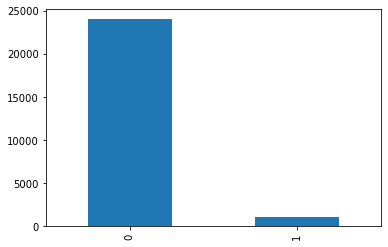

In [5]:
a['class'].value_counts().plot(kind='bar')

In [6]:
X, y = a.iloc[:, 1:66], a.iloc[:,66]
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = .2, random_state = 10)

In [7]:
xgb.XGBClassifier()

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)

In [8]:
smallest = y_train.sum()
largest = len(y_train) - smallest
spw = math.sqrt(largest / smallest)
print(smallest, largest, spw)

901 19195 4.615637176845651


In [9]:
model1 = xgb.XGBClassifier(max_depth = 6,
                          subsample = 1,
                          n_estimators = 100,
                          learning_rate = 0.1,
                          random_state = 5,
                          scale_pos_weight = spw
                          )
model1.fit(X_train, y_train)
y_predict = model1.predict(X_test)
y_train_predict = model1.predict(X_train)
print('Train accuracy',accuracy_score(y_train, y_train_predict))
print('Test accuracy',accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))
pd.crosstab(y_test, y_predict)

Train accuracy 0.9983081210191083
Test accuracy 0.9781094527363184
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4800
           1       0.89      0.58      0.70       225

    accuracy                           0.98      5025
   macro avg       0.94      0.79      0.85      5025
weighted avg       0.98      0.98      0.98      5025



col_0,0,1
class,,
0,4784,16
1,94,131


##### Παρατηρούμε ότι χωρίς parameter tuning έχουμε αρκετά χαμηλό f1 score για τις εταιρείες που θα χρεοκοπήσουν

Επιπλέον, παρατηρούμε ότι έχουμε 16 εταιρείες που δεν έχουν χρεοκοπήσει και καταχωρήθηκαν ως χρεοκοπημένες.
Γεγονός που δεν μας επηρεάζει σημαντικά.

Σημαντικό όμως είναι το γεγονός ότι έχουμε 94 χρεοκοπημένες εταιρείες που έχουν καταχωρηθεί ως μη χρεοκοπημένες.

Επομένως πρέπει να πραγματοποιήσουμε καλύτερο hyperparameter tuning για το μοντέλο μας. Αυτό, θα επιτευχθεί χρησιμοποιώντας την μέθοδο GridsearchCV, έτσι ώστε να βρεθούν οι βέλτιστες τιμές σε παραμέτρους που θα μας αποφέρουν υψηλότερο f1 score.


In [10]:

paramGrid = {
    
    'max_depth': [6],
    'subsample': [0.5, 0.75],
    'colsample_bytree': [0.75],
    'learning_rate': [0.1, 0.5],
    'n_estimators': [100, 200],
    'min_child_weight': [5, 15],
    'colsample_bylevel': [0.75],
    'scale_pos_weight': [spw],
    'objective' : ['binary:logistic'],
    'eval_metric' : ['logloss'],
    }
xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

cv = StratifiedKFold()

xgb_rs = GridSearchCV(estimator=xgb_clf, param_grid=paramGrid, scoring='f1', refit ='f1', cv=cv, verbose=4 )

xgb_rs.fit(X_train, y_train)

print("Best parametrs found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.5;, score=0.703 total time=   0.9s
[CV 2/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.5;, score=0.635 total time=   0.4s
[CV 3/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.5;, score=0.622 total time=   0.4s
[CV 4/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=5, n_estimators=100, objec

In [12]:
print("Best parameters found: ", xgb_rs.best_params_)
print("Best accuracy found: ", xgb_rs.best_score_)
print("Best estimator ", xgb_rs.best_estimator_)

Best parameters found:  {'colsample_bylevel': 0.75, 'colsample_bytree': 0.75, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 6, 'min_child_weight': 15, 'n_estimators': 200, 'objective': 'binary:logistic', 'scale_pos_weight': 4.615637176845651, 'subsample': 0.75}
Best accuracy found:  0.6842943605600555
Best estimator  XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.75, colsample_bynode=1, colsample_bytree=0.75,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=0, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=15,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
          

In [13]:
best = xgb_rs.best_estimator_
preds = (xgb_rs.predict_proba(X_test)[:,1] >= 0.51).astype(int)
print(accuracy_score(y_test, preds))
print(f1_score(y_test, preds))


0.9793034825870647
0.7346938775510203


In [14]:

paramGrid = {
    
    'max_depth': [6],
    'subsample': [0.75],
    'colsample_bytree': [0.75],
    'learning_rate': [0.1],
    'n_estimators': [200],
    'min_child_weight': [15],
    'colsample_bylevel': [0.75],
    'scale_pos_weight': [4.615637176845651],
    'objective' : ['binary:logistic'],
    'eval_metric' : ['logloss'],
    }

xgb_clf = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0)

cv = StratifiedKFold()

xgb_rs = GridSearchCV(estimator=xgb_clf, param_grid=paramGrid, scoring='f1', refit ='f1', cv=cv, verbose=4 )

xgb_rs.fit(X, y)






Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=15, n_estimators=200, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.75;, score=0.665 total time=   0.8s
[CV 2/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=15, n_estimators=200, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.75;, score=0.644 total time=   0.7s
[CV 3/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=15, n_estimators=200, objective=binary:logistic, scale_pos_weight=4.615637176845651, subsample=0.75;, score=0.690 total time=   0.7s
[CV 4/5] END colsample_bylevel=0.75, colsample_bytree=0.75, eval_metric=logloss, learning_rate=0.1, max_depth=6, min_child_weight=15, n_estimators=200, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=0, grow_policy=None,
                                     importance_type=None,
                                     interaction_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'colsample_bylevel': [0.75],
                         'colsample_bytree': [0.75], 'eval_metric': ['logloss'],
                         'learning_rate': [0.1], 'max_

In [15]:
best = xgb_rs.best_estimator_
preds = xgb_rs.predict(X)
print(accuracy_score(y, preds))
print(f1_score(y, preds))

0.9981290553719995
0.9793769197016235


In [16]:
test = pd.read_csv('test.csv')
test = test.apply(pd.to_numeric, errors = 'coerce', downcast = 'integer')



/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (2,3,4,7,8,10,11,15,19,23,26,30,36,37,39,49,52,58,60) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
X2 = X.columns
print(X2)

Index(['forecasting period', 'net_profit_over_total_assets',
       'total_liabilities_over_total_assets',
       'working_capital_over_total_assets',
       'current_assets_over_short_term_liabilities',
       'cash_plus_short_term_securities_plus_receivables_minus_short_term_liabilities_over_operating_expenses_minus_depreciation_times_365',
       'retained_earnings_over_total_assets', 'EBIT_over_total_assets',
       'book_value_of_equity_over_total_liabilities',
       'sales_over_total_assets', 'equity_over_total_assets',
       'gross_profit_plus_extraordinary_items_plus_financial_expenses_over_total_assets',
       'gross_profit_over_short_term_liabilities',
       'gross_profit_plus_depreciation_over_sales',
       'gross_profit_plus_interest_over_total_assets',
       'total_liabilities_times_365_over_gross_profit_plus_depreciation',
       'gross_profit_plus_depreciation_over_total_liabilities',
       'total_assets_over_total_liabilities', 'gross_profit_over_total_assets',
 

In [19]:
y2 = xgb_rs.predict(test[X2])
print(y2[:100])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [20]:
submission = pd.DataFrame()
submission['id'] = test['id']
submission['class'] = y2 # our model predictions on the test dataset
submission.head(28)
submission.to_csv('sub.csv', index=False)